#Introduction

The COVID-19 pandemic has placed immense pressure on hospitals, which serve as the frontline defense against the virus. Rapid and accurate identification of COVID-positive patients is crucial for managing hospital resources, ensuring patient safety, and preventing the virus's spread within healthcare facilities. Traditional methods of diagnosing COVID-19 often rely on extensive manual testing and delayed laboratory results, which can strain hospital workflows and lead to inefficient resource allocation.

This project focuses on developing a machine learning model tailored for hospital use, leveraging patient data such as symptoms, vital signs, and demographic information to predict COVID-19 status. By prioritizing the identification of COVID-positive patients, this model aims to optimize bed occupancy, streamline testing workflows, and enable timely isolation and treatment of infected individuals.

The ultimate goal is to equip hospitals with a data-driven tool that improves screening efficiency, reduces the burden of unnecessary testing, and enhances the overall quality of patient care during the ongoing pandemic.

#Business Goal:
To develop an AI-driven solution that enhances COVID-19 screening in high-risk areas such as healthcare facilities prioritizing individuals most likely to be COVID-positive. The goal is to optimize resource allocation, minimize unnecessary testing, and ensure early intervention to reduce the spread of the virus.

#Key Performance Indicator (KPI):
Accuracy in Positive Case Detection: Achieve at least 95% recall for identifying COVID-positive individuals to ensure minimal missed diagnoses in high-risk areas.
Testing Efficiency: Reduce the proportion of unnecessary tests (false positives) by 20% compared to manual or non-AI screening methods, measured by precision improvement.

#Data  Load

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

In [ ]:
import os
print(os.getcwd())
from google.colab import files
uploaded =files.upload()

/content


Saving hospital1.csv to hospital1 (1).csv
Saving hospital2.csv to hospital2 (1).csv


In [ ]:
file_path1 = "/content/hospital1.csv"
file_path2 = "/content/hospital2.csv"

hospital1 = pd.read_csv(file_path1,encoding='ISO8859_2',sep=';')
hospital2 = pd.read_csv(file_path2,encoding='ISO8859_2',sep=';')

#Function to analyze the hospitals


##Quick look to the data

In [ ]:
hospital1.head()

,patient ID,patient ID.1,nationality,age,gender K=female E=male,date_of_first_symptoms,BASVURUTARIHI,fever_temperature,oxygen_saturation,history_of_fever,...,chronic_hematologic_disease,AIDS_HIV,diabetes_mellitus_type_1,diabetes_mellitus_type_2,rheumatologic_disorder,dementia,tuberculosis,smoking,other_risks,PCR_result
0,11850006,11850006,T.C.,47,K,2022-01-01 00:00:00,2022-01-01 00:00:00,"38,2",96.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,positive
1,4373630,4373630,T.C.,23,K,2022-01-01 00:00:00,2022-01-01 00:00:00,37,96.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,positive
2,12172023,12172023,T.C.,26,K,2022-01-01 00:00:00,2022-01-01 00:00:00,38,95.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,positive
3,72856168,72856168,T.C.,60,K,2022-01-01 00:00:00,2022-01-01 00:00:00,"36,5",95.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,positive
4,72200559,72200559,T.C.,72,K,2021-12-22 00:00:00,2021-12-22 00:00:00,"36,9",96.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,positive


In [ ]:
hospital2.head()

,patient_id,admission_id,country_of_residence,age,sex,date_of_first_symptoms,admission_date,fever_temperature,oxygen_saturation,history_of_fever,...,chronic_hematologic_disease,AIDS_HIV,diabetes_mellitus_type_1,diabetes_mellitus_type_2,rheumatologic_disorder,dementia,tuberculosis,smoking,other_risks,PCR_result
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,NaN
1,88567155.0,45.0,T.C.,52.0,E=male K=female,2021-03-01 00:00:00,2021-03-01 00:00:00,"37,3",-1.0,0.0,...,0,0,0,0,0,0,0,0,0,positive
2,36069621.0,181.0,T.C.,47.0,K,2021-03-01 08:38:00,2021-03-01 08:38:00,38,95.0,1.0,...,0,0,0,0,0,0,0,0,0,positive
3,57644199.0,36.0,T.C.,36.0,K,2021-03-01 08:39:00,2021-03-01 08:39:00,"37,5",88.0,0.0,...,0,0,0,0,0,0,0,0,0,positive
4,81365404.0,32.0,T.C.,30.0,E,2021-03-01 09:25:00,2021-03-01 09:25:00,"37,8",87.0,1.0,...,0,0,0,0,0,0,0,0,0,positive


##Function

In [ ]:
#Wrote this function after observing the data for approximately 5 minutes

def analyze_hospital_data(df):
    """
    Analyze and visualize data from a hospital dataset.

    Parameters:
    - df: DataFrame, the hospital dataset.
    """
    # Automatically identify numerical columns
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

    symptoms_columns = [
    'history_of_fever', 'cough',
    'sore_throat', 'runny_nose', 'wheezing', 'shortness_of_breath',
    'lower_chest_wall_indrawing', 'chest_pain', 'conjunctivitis',
    'lymphadenopathy', 'headache', 'loss_of_smell', 'loss_of_taste',
    'fatigue_malaise', 'anorexia', 'altered_consciousness_confusion',
    'muscle_aches', 'joint_pain', 'inability_to_walk', 'abdominal_pain',
    'diarrhoea', 'vomiting_nausea', 'skin_rash', 'bleeding', 'other_symptoms',
    'chronic_cardiac_disease', 'hypertension', 'chronic_pulmonary_disease',
    'asthma', 'chronic_kidney_disease', 'obesity', 'liver_disease', 'asplenia',
    'chronic_neurological_disorder', 'malignant_neoplasm',
    'chronic_hematologic_disease', 'AIDS_HIV', 'diabetes_mellitus_type_1',
    'diabetes_mellitus_type_2', 'rheumatologic_disorder', 'dementia',
    'tuberculosis', 'smoking', 'other_risks'
]

    # Automatically identify date column
    date_column = 'admission_date' if 'admission_date' in df.columns else None

    # Automatically identify gender column
    gender_column = [col for col in df.columns if 'gender' in col.lower() or 'sex' in col.lower()]
    gender_column = gender_column[0] if gender_column else None

    # 1. General information about the dataset
    print("Dataset Information:\n")
    df.info()
    print("\nColumn Names:\n", df.columns.tolist())
    print("\nData Types:\n", df.dtypes)
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nBasic Statistics:\n", df.describe())
    print("\nNumber of Duplicate Rows:\n", df.duplicated().sum())

    # 2. Correlation Heatmap
    print("\nGenerating Correlation Heatmap...")
    correlation_matrix = df[numerical_columns].corr()
    plt.figure(figsize=(20, 16))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        cbar=True,
        linewidths=0.5,
    )
    plt.title('Correlation Heatmap', fontsize=20, pad=20)
    plt.xticks(fontsize=10, rotation=90)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

    # 3. Distribution of Fever Temperatures
    if 'fever_temperature' in df.columns:
        print("\nGenerating Fever Temperature Distribution...")
        plt.figure(figsize=(12, 6))
        df['fever_temperature'].hist(bins=30, edgecolor='black', alpha=0.7)
        plt.title('Distribution of Fever Temperatures', fontsize=16, pad=20)
        plt.xlabel('Fever Temperature (°C)', fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.xticks(fontsize=12, rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    # 4. Gender Distribution
    if gender_column:
        print("\nGenerating Gender Distribution...")
        plt.figure(figsize=(12, 6))
        df[gender_column].value_counts().plot(kind='bar', edgecolor='black', alpha=0.7)
        plt.title('Gender Distribution of Patients', fontsize=16, pad=20)
        plt.xlabel('Gender', fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.xticks(fontsize=12, rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    # 5. Frequency of Each Symptom
    if symptoms_columns:
      print("\nGenerating Symptom Frequency Distribution (Top 20)...")

      # Calculate the sum for each symptom and sort by frequency
      symptom_counts = df[symptoms_columns].sum().sort_values(ascending=False)

      # Select the top 20 symptoms
      top_20_symptoms = symptom_counts.head(20)

      # Plot the top 20 symptoms
      top_20_symptoms.plot(kind='bar', figsize=(16, 8), edgecolor='black', alpha=0.7)

      # Add titles and labels
      plt.title('Top 20 Most Frequent Symptoms', fontsize=16, pad=20)
      plt.xlabel('Symptoms', fontsize=14)
      plt.ylabel('Frequency', fontsize=14)
      plt.xticks(fontsize=12, rotation=45)
      plt.grid(axis='y', linestyle='--', alpha=0.7)
      plt.tight_layout()
      plt.show()

#Analyzing hospital1

In [ ]:
#Taking a quick look to the data
hospital1.head()

,patient ID,patient ID.1,nationality,age,gender K=female E=male,date_of_first_symptoms,BASVURUTARIHI,fever_temperature,oxygen_saturation,history_of_fever,...,chronic_hematologic_disease,AIDS_HIV,diabetes_mellitus_type_1,diabetes_mellitus_type_2,rheumatologic_disorder,dementia,tuberculosis,smoking,other_risks,PCR_result
0,11850006,11850006,T.C.,47,K,2022-01-01 00:00:00,2022-01-01 00:00:00,"38,2",96.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,positive
1,4373630,4373630,T.C.,23,K,2022-01-01 00:00:00,2022-01-01 00:00:00,37,96.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,positive
2,12172023,12172023,T.C.,26,K,2022-01-01 00:00:00,2022-01-01 00:00:00,38,95.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,positive
3,72856168,72856168,T.C.,60,K,2022-01-01 00:00:00,2022-01-01 00:00:00,"36,5",95.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,positive
4,72200559,72200559,T.C.,72,K,2021-12-22 00:00:00,2021-12-22 00:00:00,"36,9",96.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,positive


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   patient ID                       14712 non-null  int64  
 1   patient ID.1                     14712 non-null  int64  
 2   nationality                      14712 non-null  object 
 3   age                              14712 non-null  int64  
 4   gender K=female E=male           14712 non-null  object 
 5   date_of_first_symptoms           14712 non-null  object 
 6   BASVURUTARIHI                    14712 non-null  object 
 7   fever_temperature                14244 non-null  object 
 8   oxygen_saturation                14708 non-null  float64
 9   history_of_fever                 14712 non-null  int64  
 10  cough                            14712 non-null  int64  
 11  sore_throat                      14712 non-null  int64  
 

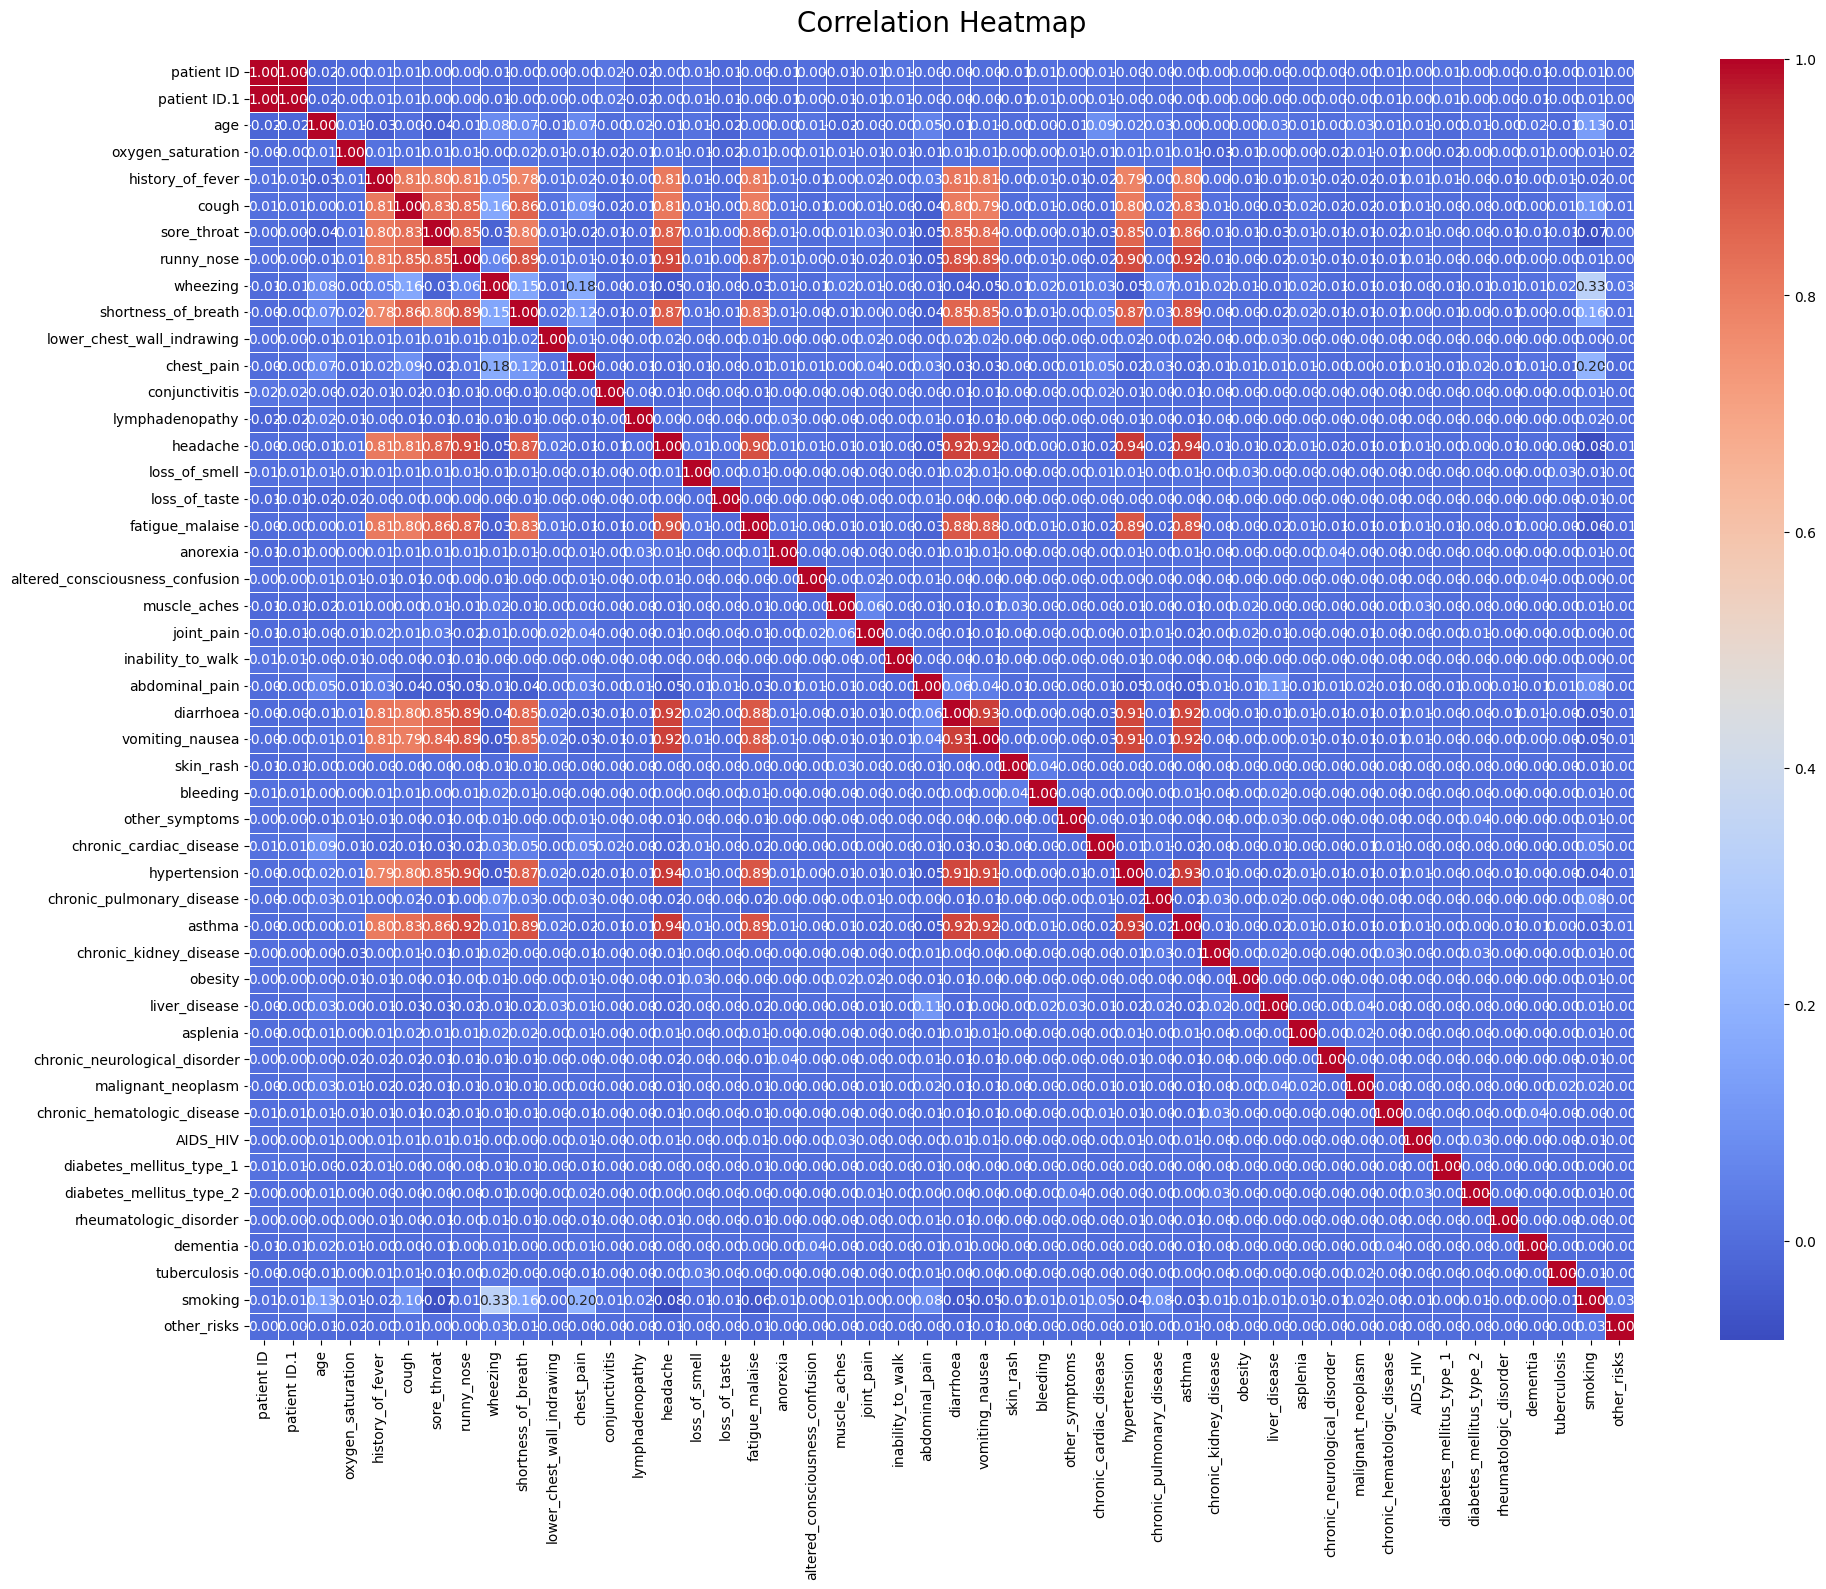


Generating Fever Temperature Distribution...


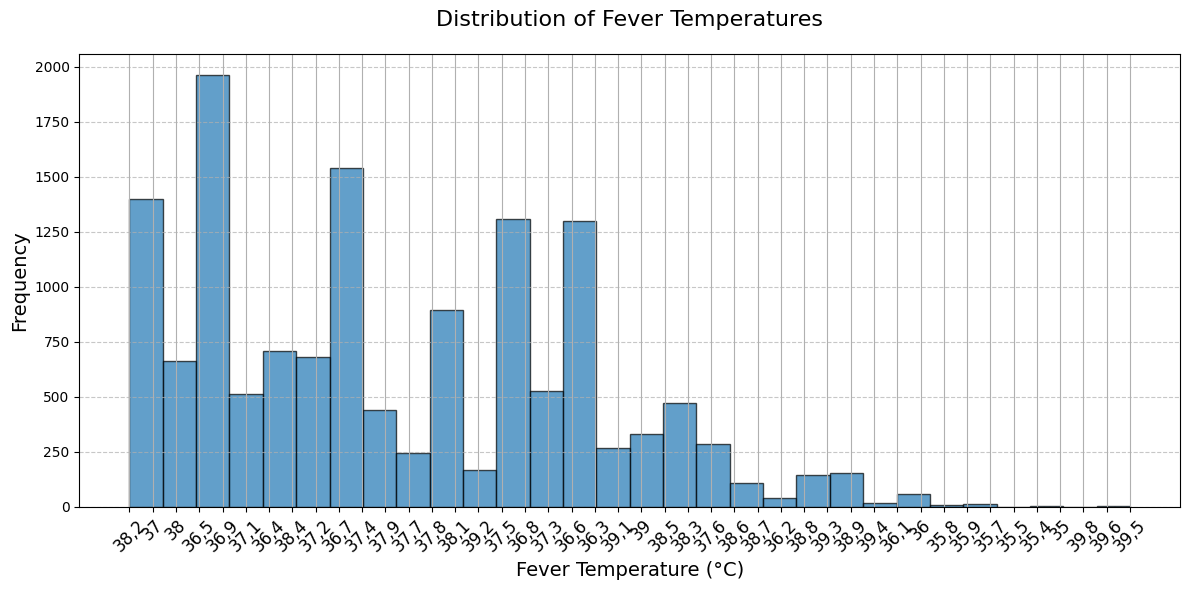


Generating Gender Distribution...


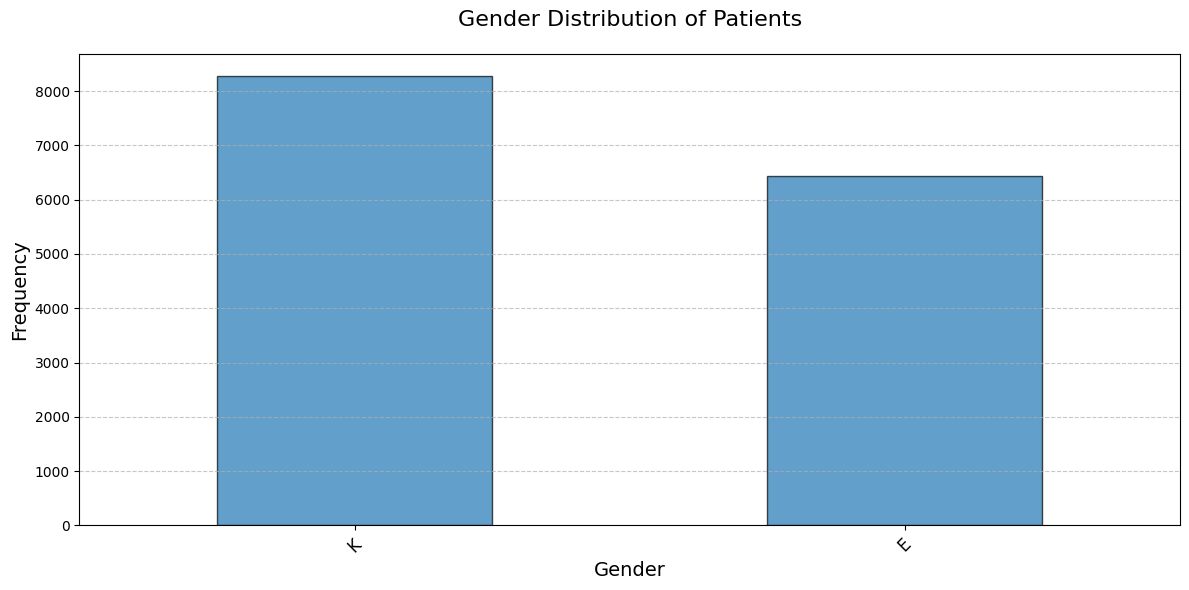


Generating Symptom Frequency Distribution (Top 20)...


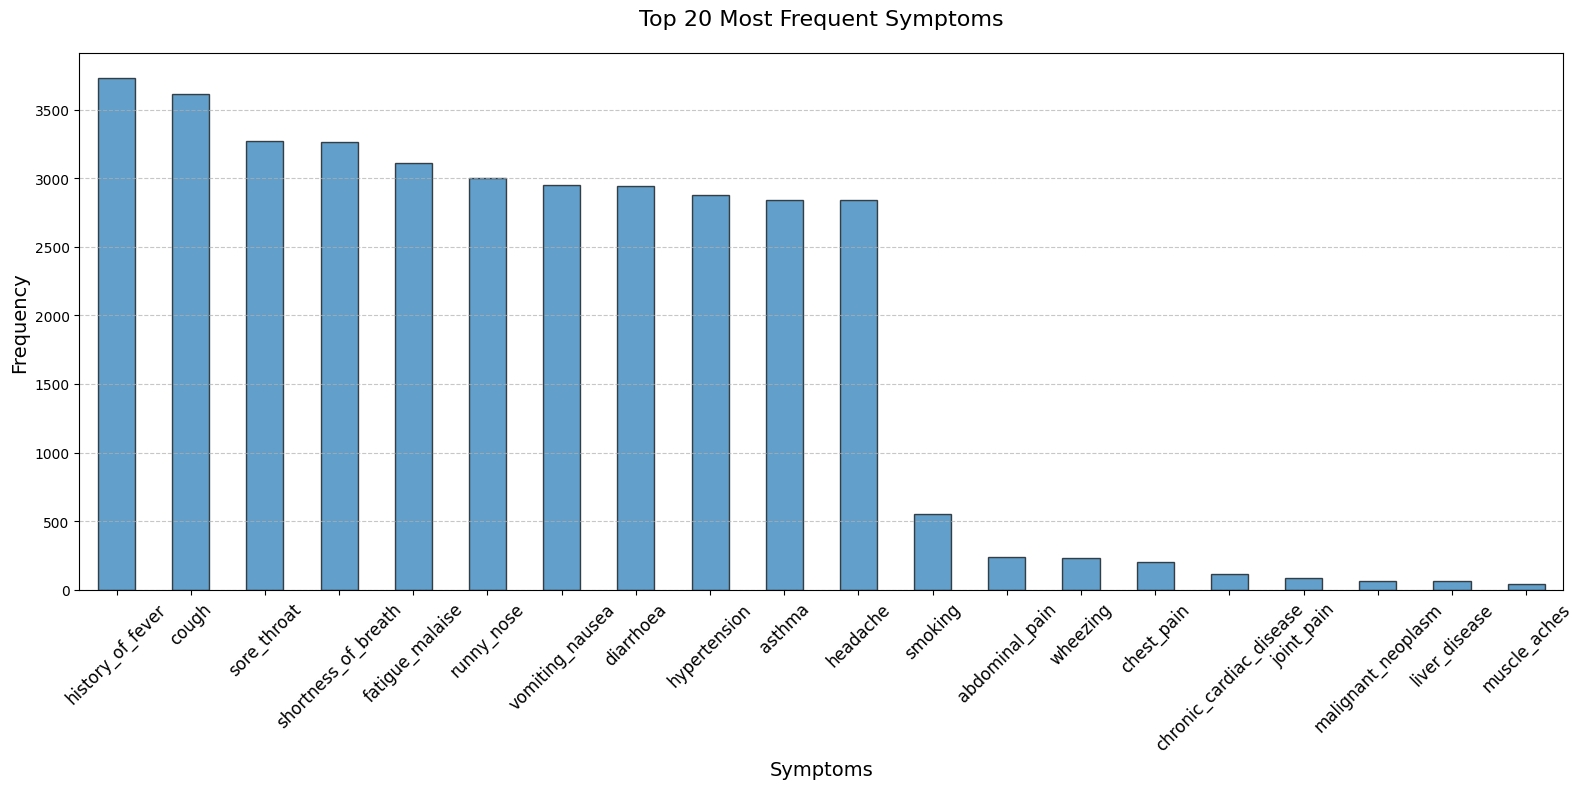

In [ ]:
# Analyzing hospital 1
analyze_hospital_data(hospital1)

###Data Observations of hospital1

-patient ID and patient ID.1 are exactly the same based on the correlation matrix

-data types needs to be modified (fever_temperature) (goal is to make every column the same data type as in hospital2, only the temperatue float the other numberic data will be integer


-many missing values in  PCR_results: 1176 --> 0: negative, 1:positive, 2: no result)

-no duplicate rows

-column names needs to be standardized (turkish admission date :D )




#Analyzing hospital2

In [ ]:
#Taking a quick look to the data
hospital2.head()

,patient_id,admission_id,country_of_residence,age,sex,date_of_first_symptoms,admission_date,fever_temperature,oxygen_saturation,history_of_fever,...,chronic_hematologic_disease,AIDS_HIV,diabetes_mellitus_type_1,diabetes_mellitus_type_2,rheumatologic_disorder,dementia,tuberculosis,smoking,other_risks,PCR_result
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,NaN
1,88567155.0,45.0,T.C.,52.0,E=male K=female,2021-03-01 00:00:00,2021-03-01 00:00:00,"37,3",-1.0,0.0,...,0,0,0,0,0,0,0,0,0,positive
2,36069621.0,181.0,T.C.,47.0,K,2021-03-01 08:38:00,2021-03-01 08:38:00,38,95.0,1.0,...,0,0,0,0,0,0,0,0,0,positive
3,57644199.0,36.0,T.C.,36.0,K,2021-03-01 08:39:00,2021-03-01 08:39:00,"37,5",88.0,0.0,...,0,0,0,0,0,0,0,0,0,positive
4,81365404.0,32.0,T.C.,30.0,E,2021-03-01 09:25:00,2021-03-01 09:25:00,"37,8",87.0,1.0,...,0,0,0,0,0,0,0,0,0,positive


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12737 entries, 0 to 12736
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   patient_id                       12734 non-null  float64
 1   admission_id                     12734 non-null  float64
 2   country_of_residence             12734 non-null  object 
 3   age                              12734 non-null  float64
 4   sex                              12734 non-null  object 
 5   date_of_first_symptoms           12734 non-null  object 
 6   admission_date                   12734 non-null  object 
 7   fever_temperature                11515 non-null  object 
 8   oxygen_saturation                12730 non-null  float64
 9   history_of_fever                 12729 non-null  float64
 10  cough                            12736 non-null  float64
 11  sore_throat                      12736 non-null  float64
 

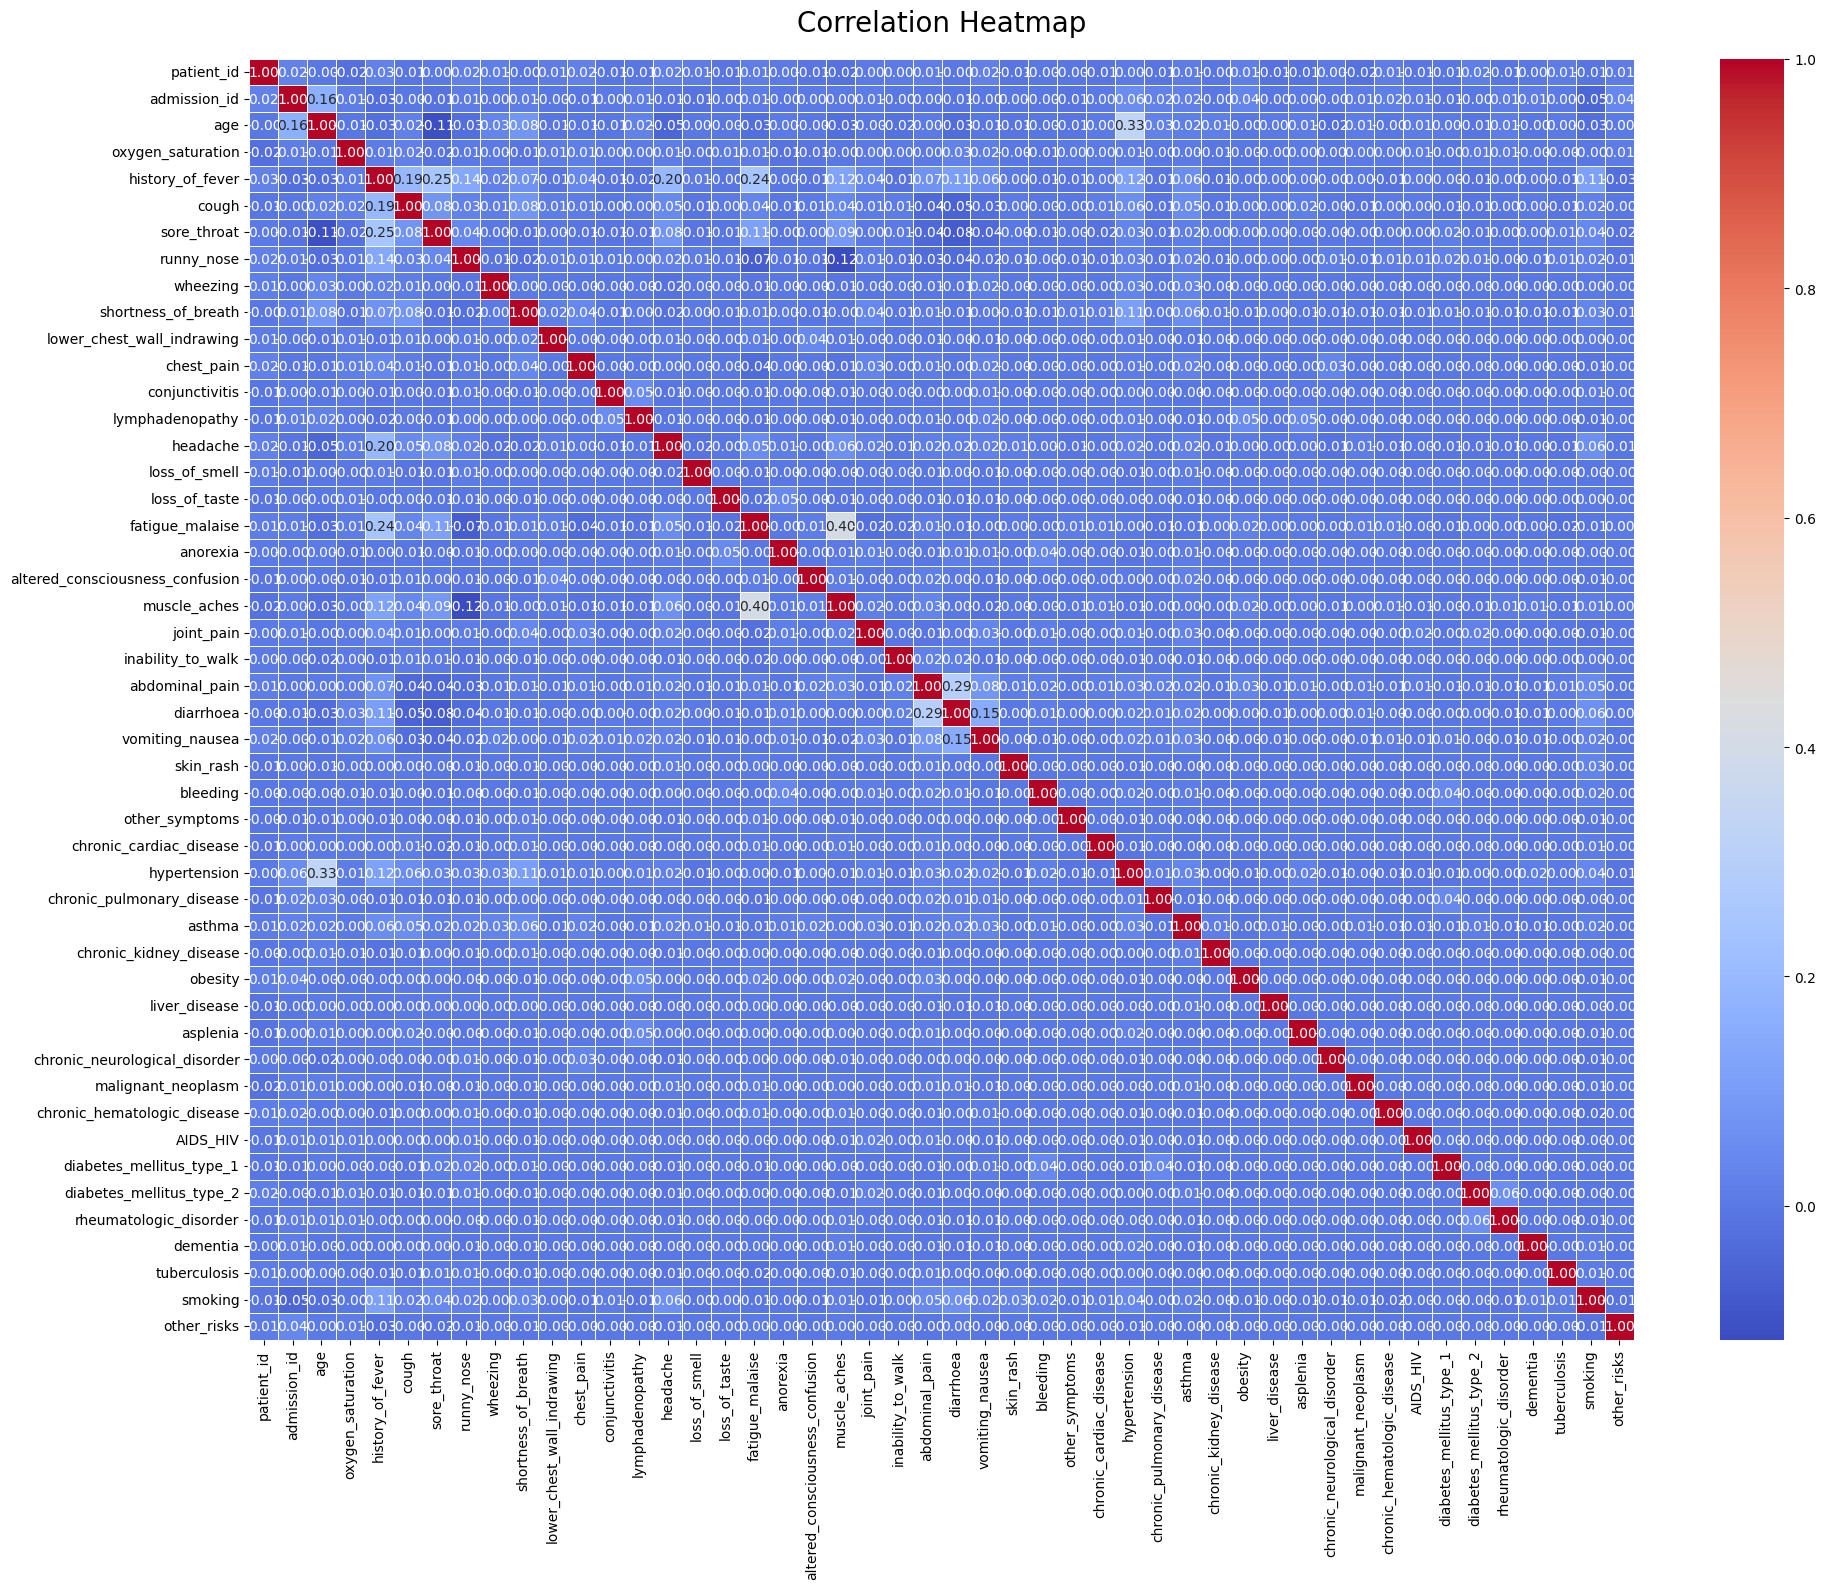


Generating Fever Temperature Distribution...


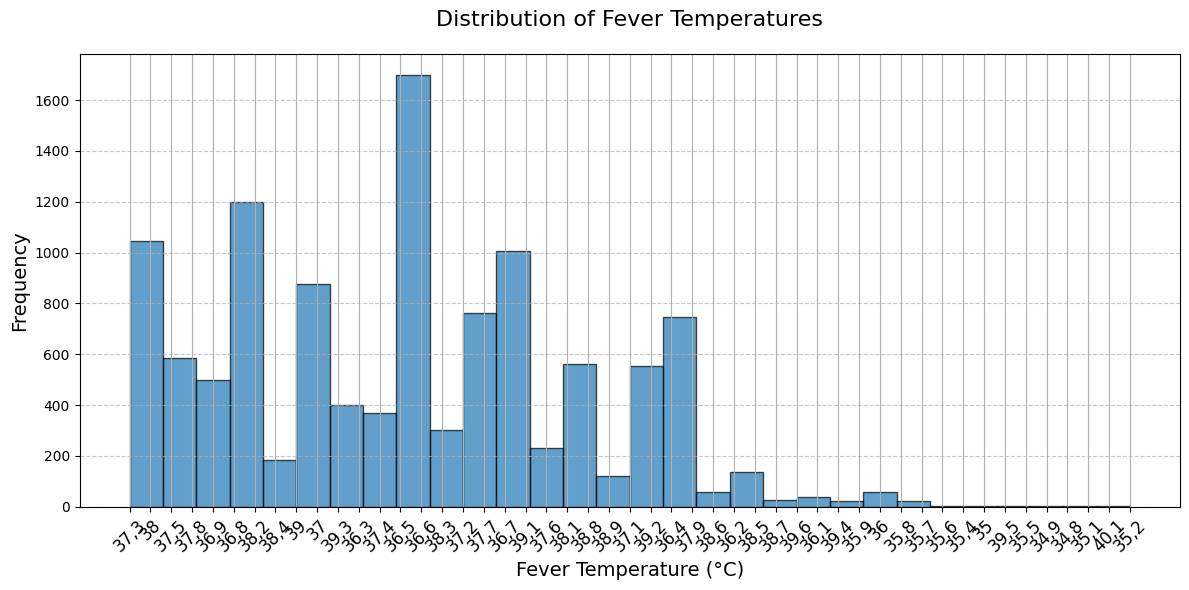


Generating Gender Distribution...


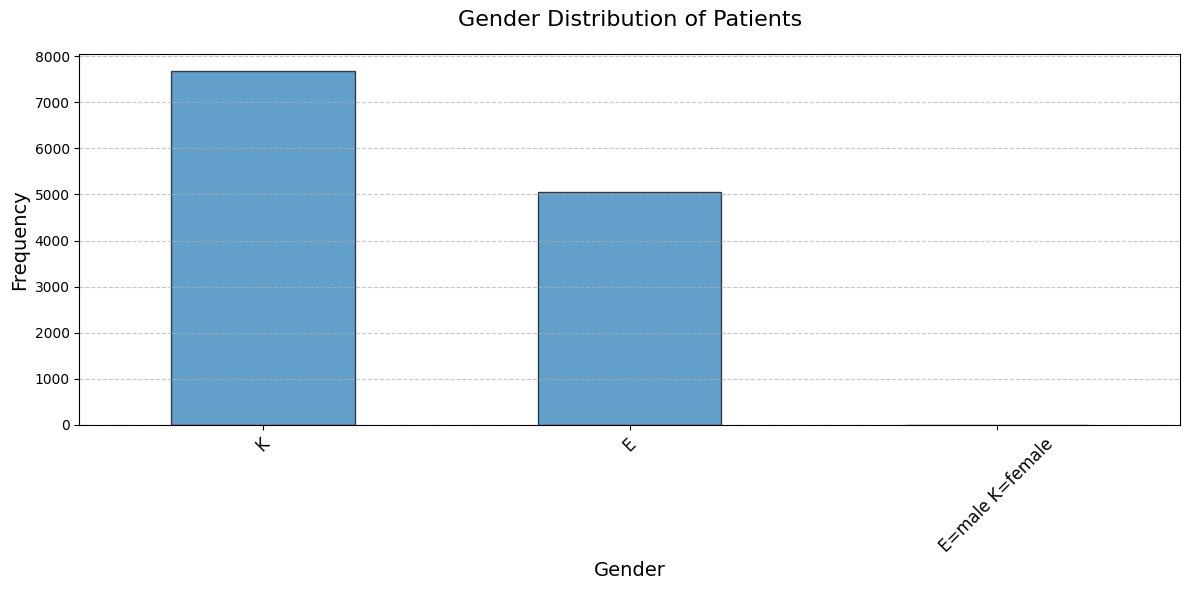


Generating Symptom Frequency Distribution (Top 20)...


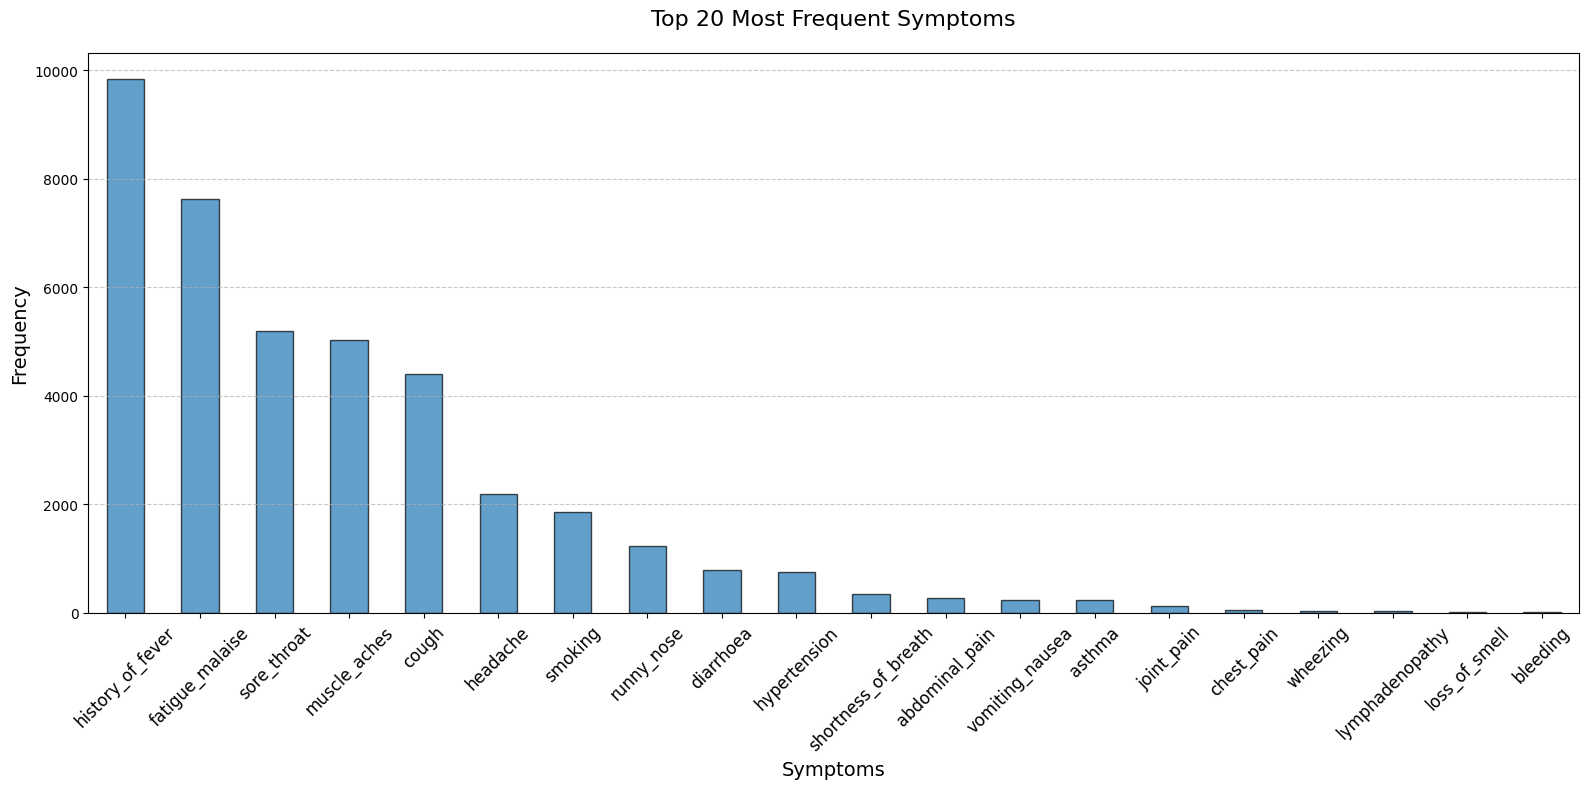

In [ ]:
# Analyzing hospital 2
analyze_hospital_data(hospital2)

##Data Observations of hospital2

-many missing value in temperature (1222)

-in the gender distribution there is a third category, because of legend between the data

-column names needs to be standardized

##Comparing data between hospital1 and hospital2

##Comparing data types

In [ ]:
import io  # Import the io module to handle in-memory text streams

# Capture the .info() output of hospital1_copy
buffer1 = io.StringIO()  # Create a text buffer
hospital1.info(buf=buffer1)  # Write the .info() output to the buffer
info1 = buffer1.getvalue()  # Get the buffer content as a string

# Capture the .info() output of hospital2_copy
buffer2 = io.StringIO()  # Create another text buffer
hospital2.info(buf=buffer2)  # Write the .info() output to the buffer
info2 = buffer2.getvalue()  # Get the buffer content as a string

# Print the headers for both datasets
print("Hospital 1 Info:".ljust(50) + "Hospital 2 Info:")
print("-" * 50 + " " + "-" * 50)  # Add a dividing line

# Print the .info() output of both datasets side by side
for line1, line2 in zip(info1.splitlines(), info2.splitlines()):  # Match lines from both outputs
    print(line1.ljust(50) + line2)  # Align text to make it easier to read


Hospital 1 Info:                                  Hospital 2 Info:
-------------------------------------------------- --------------------------------------------------
<class 'pandas.core.frame.DataFrame'>             <class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711             RangeIndex: 12737 entries, 0 to 12736
Data columns (total 54 columns):                  Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype   #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  ---  ------                           --------------  -----  
 0   patient ID                       14712 non-null  int64   0   patient_id                       12734 non-null  float64
 1   patient ID.1                     14712 non-null  int64   1   admission_id                     12734 non-null  float64
 2   nationality                      14712 non-null  object  2   country_of_res

#Data preparation

##Standardization

In [ ]:
# Create a copy of hospital1 and hospital2 dataset
hospital1_copy = hospital1.copy()
hospital2_copy = hospital2.copy()

In [ ]:
# Standardize the column names of both datasets
hospital1_copy.columns = hospital1_copy.columns.str.strip().str.lower().str.replace(' ', '_')
hospital2_copy.columns = hospital2_copy.columns.str.strip().str.lower().str.replace(' ', '_')

# Making the column names similar after inspection
hospital1_copy.rename(columns={'basvurutarihi': 'admission_date'}, inplace=True) #basvurutarihi means admission date in turkish
hospital1_copy.rename(columns={'patient_id.1': 'admission_id'}, inplace=True)
hospital1_copy.rename(columns={'gender_k=female_e=male': 'sex'}, inplace=True)

hospital2_copy.rename(columns={'country_of_residence': 'nationality'}, inplace=True)

# Dropping data, where the nationalities are NaN
hospital1_copy = hospital1_copy[~hospital1_copy['nationality'].isnull()]
hospital2_copy = hospital2_copy[~hospital2_copy['nationality'].isnull()]

In [ ]:
#hospital1_copy.sub(hospital2_copy), to show the columns of each datasets next to each other

In [ ]:
# Replace commas with dots in the 'fever_temperature' column
hospital1_copy['fever_temperature'] = hospital1_copy['fever_temperature'].str.replace(',', '.')
hospital2_copy['fever_temperature'] = hospital2_copy['fever_temperature'].str.replace(',', '.')

# Convert the column to a numeric type
hospital1_copy['fever_temperature'] = pd.to_numeric(hospital1_copy['fever_temperature'], errors='coerce')
hospital2_copy['fever_temperature'] = pd.to_numeric(hospital2_copy['fever_temperature'], errors='coerce')

# Check the updated column
print(hospital1_copy['fever_temperature'].head())
print(hospital2_copy['fever_temperature'].head())


0    38.2
1    37.0
2    38.0
3    36.5
4    36.9
Name: fever_temperature, dtype: float64
1    37.3
2    38.0
3    37.5
4    37.8
5    36.9
Name: fever_temperature, dtype: float64


In [ ]:
#Modifying the patient_id to integer in hospital2_copy
hospital2_copy['patient_id'] = hospital2_copy['patient_id'].astype(int)

# Check the updated column
print(hospital2_copy['patient_id'].head())

1    88567155
2    36069621
3    57644199
4    81365404
5    82027164
Name: patient_id, dtype: int64


In [ ]:
hospital1_copy.head()

,patient_id,admission_id,nationality,age,sex,date_of_first_symptoms,admission_date,fever_temperature,oxygen_saturation,history_of_fever,...,chronic_hematologic_disease,aids_hiv,diabetes_mellitus_type_1,diabetes_mellitus_type_2,rheumatologic_disorder,dementia,tuberculosis,smoking,other_risks,pcr_result
0,11850006,11850006,T.C.,47,K,2022-01-01 00:00:00,2022-01-01 00:00:00,38.2,96.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,positive
1,4373630,4373630,T.C.,23,K,2022-01-01 00:00:00,2022-01-01 00:00:00,37.0,96.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,positive
2,12172023,12172023,T.C.,26,K,2022-01-01 00:00:00,2022-01-01 00:00:00,38.0,95.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,positive
3,72856168,72856168,T.C.,60,K,2022-01-01 00:00:00,2022-01-01 00:00:00,36.5,95.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,positive
4,72200559,72200559,T.C.,72,K,2021-12-22 00:00:00,2021-12-22 00:00:00,36.9,96.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,positive


In [ ]:
hospital2_copy.head()

,patient_id,admission_id,nationality,age,sex,date_of_first_symptoms,admission_date,fever_temperature,oxygen_saturation,history_of_fever,...,chronic_hematologic_disease,aids_hiv,diabetes_mellitus_type_1,diabetes_mellitus_type_2,rheumatologic_disorder,dementia,tuberculosis,smoking,other_risks,pcr_result
1,88567155,45.0,T.C.,52.0,E=male K=female,2021-03-01 00:00:00,2021-03-01 00:00:00,37.3,-1.0,0.0,...,0,0,0,0,0,0,0,0,0,positive
2,36069621,181.0,T.C.,47.0,K,2021-03-01 08:38:00,2021-03-01 08:38:00,38.0,95.0,1.0,...,0,0,0,0,0,0,0,0,0,positive
3,57644199,36.0,T.C.,36.0,K,2021-03-01 08:39:00,2021-03-01 08:39:00,37.5,88.0,0.0,...,0,0,0,0,0,0,0,0,0,positive
4,81365404,32.0,T.C.,30.0,E,2021-03-01 09:25:00,2021-03-01 09:25:00,37.8,87.0,1.0,...,0,0,0,0,0,0,0,0,0,positive
5,82027164,81.0,T.C.,41.0,K,2021-03-01 09:50:00,2021-03-01 09:50:00,36.9,89.0,0.0,...,0,0,0,0,0,0,0,0,0,positive


##Hospital1


###Checking missing values in hospital1

In [ ]:
# Check for missing values in each column
missing_values = hospital1_copy.isnull().sum()

# Filter columns with missing values
columns_with_missing = missing_values[missing_values > 0]

# Display the columns with their missing value counts
print(columns_with_missing)

fever_temperature                 468
oxygen_saturation                   4
chronic_kidney_disease              7
obesity                            22
liver_disease                       6
asplenia                           22
chronic_neurological_disorder       2
chronic_hematologic_disease         2
aids_hiv                            2
diabetes_mellitus_type_1            3
diabetes_mellitus_type_2            2
rheumatologic_disorder              2
dementia                            2
pcr_result                       1176
dtype: int64


###Filling the missing data where it is necessary

####Mean

In [ ]:
#Check for outliers and remove them


#Filling data with mean in fever_temperature

if 'fever_temperature' in hospital1_copy.columns:
    # Calculate the mean of the column, ignoring NaN values
    mean_value = hospital1_copy['fever_temperature'].mean()

    # Fill missing values with the mean
    hospital1_copy['fever_temperature'] = hospital1_copy['fever_temperature'].fillna(mean_value)

    # Verify the result
    print(f"Missing values after filling: {hospital1_copy['fever_temperature'].isnull().sum()}")
    print(f"Filled missing values with the mean: {mean_value}")


Missing values after filling: 0
Filled missing values with the mean: 37.34355518112889


####Mode

In [ ]:
#Filling data with median where it is necessary

# List of columns to fill with the mode
columns_to_fill_median = [
    'oxygen_saturation', 'chronic_kidney_disease', 'obesity', 'liver_disease',
    'asplenia', 'chronic_neurological_disorder', 'chronic_hematologic_disease',
    'aids_hiv', 'diabetes_mellitus_type_1', 'diabetes_mellitus_type_2',
    'rheumatologic_disorder', 'dementia'
]

# Fill missing values with the median for each column in the list
for col in columns_to_fill_median:
    if col in hospital1_copy.columns:
        hospital1_copy[col] = hospital1_copy[col].fillna(hospital1_copy[col].mode())

# Verify the result
print(hospital1_copy[columns_to_fill_median].isnull().sum())  # Should show 0 for all columns


oxygen_saturation                 4
chronic_kidney_disease            7
obesity                          22
liver_disease                     6
asplenia                         22
chronic_neurological_disorder     2
chronic_hematologic_disease       2
aids_hiv                          2
diabetes_mellitus_type_1          3
diabetes_mellitus_type_2          2
rheumatologic_disorder            2
dementia                          2
dtype: int64


####Handling the PCR result column

In [ ]:
# Replace 'positive' with 1 and 'negative' with 0
hospital1_copy['pcr_result'] = hospital1_copy['pcr_result'].replace({'positive': 1, 'negative': 0})

# Fill missing values with 2
hospital1_copy['pcr_result'] = hospital1_copy['pcr_result'].fillna(2)

# Convert the column to integers
hospital1_copy['pcr_result'] = hospital1_copy['pcr_result'].astype(int)

# Verify the changes
print(hospital1_copy['pcr_result'].value_counts())


pcr_result
1    12434
2     1176
0     1102
Name: count, dtype: int64


<ipython-input-95-d5468b840512>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hospital1_copy['pcr_result'] = hospital1_copy['pcr_result'].replace({'positive': 1, 'negative': 0})


###Oxygen saturation false unique values




In [ ]:
# Display unique values in the 'oxygen_saturation' column
unique_values = hospital1_copy['oxygen_saturation'].unique()
print("Unique values in oxygen_saturation:", unique_values)

#It can not be 0 or -1, because of medical reasons, so i am modifying the data with the median result
if 'oxygen_saturation' in hospital1_copy.columns:
    # Calculate the median of the column, ignoring 0 and -1
    median_value = hospital1_copy.loc[~hospital1_copy['oxygen_saturation'].isin([0, -1]), 'oxygen_saturation'].median()

    # Replace 0 and -1 with the median value
    hospital1_copy['oxygen_saturation'] = hospital1_copy['oxygen_saturation'].replace({0: median_value, -1: median_value})

# Verify the changes
print("Updated 'oxygen_saturation' values where data was 0 or -1:")
print(hospital1_copy['oxygen_saturation'].value_counts())
print("Median used for replacement:", median_value)



Unique values in oxygen_saturation: [ 96.  95.  98.  90.  80.  86.  94.  88.  89.  85.  97.   0.  87.  92.
  78.  99.  91. 100.  93.  81.  79.  82.  77.  84.  83.  69.  76.  70.
  -1.  71.  nan]
Updated 'oxygen_saturation' values where data was 0 or -1:
oxygen_saturation
96.0     3624
95.0     3334
97.0     1833
98.0     1221
94.0      901
89.0      643
88.0      566
99.0      522
90.0      422
87.0      262
86.0      206
91.0      204
92.0      156
80.0      155
85.0      126
79.0      121
93.0      120
81.0       78
100.0      55
78.0       45
84.0       32
82.0       23
77.0       18
83.0       14
70.0       12
69.0        8
71.0        4
76.0        3
Name: count, dtype: int64
Median used for replacement: 95.0


###Replacing gender data

In [ ]:
#Converting data in the "sex" column to make it more understandable
# M = Man , F = Female
hospital1_copy['sex'] = hospital1_copy['sex'].replace({'E': '1', 'K': '0'})

# Verify the changes
print(hospital1_copy['sex'].value_counts())  # Count occurrences of each value

sex
0    8276
1    6436
Name: count, dtype: int64


##Hospital2

###Checking missing values in hospital2

In [ ]:
# Check for missing values in each column
missing_values = hospital2_copy.isnull().sum()

# Filter columns with missing values
columns_with_missing = missing_values[missing_values > 0]

# Display the columns with their missing value counts
print(columns_with_missing)

fever_temperature    1219
oxygen_saturation       4
history_of_fever        5
bleeding               36
other_symptoms         36
pcr_result             33
dtype: int64


###Filling the missing data where it is necessary

####Mean

In [ ]:
#Filling data with mean in fever_temperature

if 'fever_temperature' in hospital2_copy.columns:
    # Calculate the mean of the column, ignoring NaN values
    mean_value = hospital2_copy['fever_temperature'].mean()

    # Fill missing values with the mean
    hospital2_copy['fever_temperature'] = hospital2_copy['fever_temperature'].fillna(mean_value)

    # Verify the result
    print(f"Missing values after filling: {hospital2_copy['fever_temperature'].isnull().sum()}")
    print(f"Filled missing values with the mean: {mean_value}")


Missing values after filling: 0
Filled missing values with the mean: 37.34168475900998


####Mode

In [ ]:
#Filling data with median where it is necessary

# List of columns to fill with the median
columns_to_fill_median = [
    'oxygen_saturation', 'history_of_fever', 'bleeding', 'other_symptoms'
]

# Fill missing values with the median for each column in the list
for col in columns_to_fill_median:
    if col in hospital2_copy.columns:
        hospital2_copy[col] = hospital2_copy[col].fillna(hospital2_copy[col].mode())

# Verify the result
print(hospital2_copy[columns_to_fill_median].isnull().sum())  # Should show 0 for all columns


oxygen_saturation     4
history_of_fever      5
bleeding             36
other_symptoms       36
dtype: int64


####Handling the PCR result column

In [ ]:
# Replace 'positive' with 1 and 'negative' with 0
hospital2_copy['pcr_result'] = hospital2_copy['pcr_result'].replace({'positive': 1, 'negative': 0})

# Fill missing values with 2
hospital2_copy['pcr_result'] = hospital2_copy['pcr_result'].fillna(2)

# Convert the column to integers
hospital2_copy['pcr_result'] = hospital2_copy['pcr_result'].astype(int)

# Verify the changes
print(hospital2_copy['pcr_result'].value_counts())


pcr_result
1    9776
0    2925
2      33
Name: count, dtype: int64


<ipython-input-101-094edd546cc7>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hospital2_copy['pcr_result'] = hospital2_copy['pcr_result'].replace({'positive': 1, 'negative': 0})


###Oxygen saturation false unique values

In [ ]:
# Display unique values in the 'oxygen_saturation' column
unique_values = hospital2_copy['oxygen_saturation'].unique()
print("Unique values in oxygen_saturation:", unique_values)

#It can not be 0 or -1, because of medical reasons, so i am modifying the data with the median result
if 'oxygen_saturation' in hospital2_copy.columns:
    # Calculate the median of the column, ignoring 0 and -1
    median_value = hospital2_copy.loc[~hospital2_copy['oxygen_saturation'].isin([0, -1]), 'oxygen_saturation'].median()

    # Replace 0 and -1 with the median value
    hospital2_copy['oxygen_saturation'] = hospital2_copy['oxygen_saturation'].replace({0: median_value, -1: median_value})

# Verify the changes
print("Updated 'oxygen_saturation' values where data was 0 or -1:")
print(hospital2_copy['oxygen_saturation'].value_counts())
print("Median used for replacement:", median_value)


Unique values in oxygen_saturation: [ -1.  95.  88.  87.  89.  94.  96.  90.  78.  97.  99.  86.  93.  79.
  98.  91.  80.  92.  81. 100.  85.   0.  82.  84.  70.  83.  77.  71.
  nan  69.  76.  73.  68.  26.]
Updated 'oxygen_saturation' values where data was 0 or -1:
oxygen_saturation
96.0     3121
95.0     2817
97.0     1530
98.0     1036
94.0      829
89.0      621
88.0      487
99.0      418
90.0      371
87.0      258
91.0      201
86.0      172
80.0      153
92.0      123
93.0      118
85.0      105
79.0       96
100.0      58
78.0       56
81.0       50
84.0       29
82.0       27
77.0       22
70.0       11
83.0        7
71.0        6
69.0        3
76.0        2
73.0        1
68.0        1
26.0        1
Name: count, dtype: int64
Median used for replacement: 95.0


###Replacing gender data

In [ ]:
#Converting data in the "sex" column to make it more understandable
# M = Man , F = Female

hospital2_copy['sex'] = hospital2_copy['sex'].replace({'E': '1', 'K': '0'})

# Verify the changes
print(hospital2_copy['sex'].value_counts())  # Count occurrences of each value



sex
0                  7670
1                  5063
E=male K=female       1
Name: count, dtype: int64


####Replacing the "E=male K=female" value with the most frequent value

In [ ]:
if 'sex' in hospital2_copy.columns:  # Check if the 'sex' column exists
    # Replace 'E=male K=female' with NaN to handle it as missing data
    hospital2_copy['sex'] = hospital2_copy['sex'].replace('E=male K=female', None)

    # Calculate the most frequent value (mode) of the column, ignoring NaN
    mode_value = hospital2_copy['sex'].mode()[0]

    # Replace NaN values (including previously 'E=male K=female') with the mode
    hospital2_copy['sex'] = hospital2_copy['sex'].fillna(mode_value)

# Verify the changes
print("Unique values in 'sex' after replacement:")
print(hospital2_copy['sex'].unique())


Unique values in 'sex' after replacement:
['0' '1']


##Converting the neccesary columns into integers





In [ ]:
#Patiend_id to long just to make sure we do not hit the limit of integers

# List of columns to convert to integers
columns_to_convert = [
    'oxygen_saturation', 'history_of_fever', 'cough', 'sore_throat', 'runny_nose',
    'wheezing', 'shortness_of_breath', 'lower_chest_wall_indrawing', 'chest_pain',
    'conjunctivitis', 'lymphadenopathy', 'headache', 'loss_of_smell', 'loss_of_taste',
    'fatigue_malaise', 'anorexia', 'altered_consciousness_confusion', 'muscle_aches',
    'joint_pain', 'inability_to_walk', 'abdominal_pain', 'diarrhoea', 'vomiting_nausea',
    'skin_rash', 'bleeding', 'other_symptoms', 'chronic_cardiac_disease', 'hypertension',
    'chronic_pulmonary_disease', 'asthma', 'chronic_kidney_disease', 'obesity',
    'liver_disease', 'asplenia', 'chronic_neurological_disorder', 'malignant_neoplasm',
    'chronic_hematologic_disease', 'AIDS_HIV', 'diabetes_mellitus_type_1',
    'diabetes_mellitus_type_2', 'rheumatologic_disorder', 'dementia', 'tuberculosis',
    'smoking', 'other_risks', 'age', 'admission_id', 'aids_hiv', 'sex'
]

# Dictionary to store the count of replaced missing values
missing_value_counts = {}

# For hospital1_copy
for col in columns_to_convert:
    if col in hospital1_copy.columns:  # Check if the column exists in the DataFrame
        # Count missing values before filling
        missing_count = hospital1_copy[col].isnull().sum()

        # Store the count in the dictionary
        missing_value_counts[f"hospital1_copy_{col}"] = missing_count

        # Fill missing values with 999999 and convert to int
        hospital1_copy[col] = hospital1_copy[col].fillna(999999).astype(int)

# For hospital2_copy
for col in columns_to_convert:
    if col in hospital2_copy.columns:  # Check if the column exists in the DataFrame
        # Count missing values before filling
        missing_count = hospital2_copy[col].isnull().sum()

        # Store the count in the dictionary
        missing_value_counts[f"hospital2_copy_{col}"] = missing_count

        # Fill missing values with 999999 and convert to int
        hospital2_copy[col] = hospital2_copy[col].fillna(999999).astype(int)

# Print the count of replaced missing values
for column, count in missing_value_counts.items():
    print(f"Column {column}: Replaced {count} missing values")

#If the counters are both 0, that means there's no missing data in the two datasets

Column hospital1_copy_oxygen_saturation: Replaced 4 missing values
Column hospital1_copy_history_of_fever: Replaced 0 missing values
Column hospital1_copy_cough: Replaced 0 missing values
Column hospital1_copy_sore_throat: Replaced 0 missing values
Column hospital1_copy_runny_nose: Replaced 0 missing values
Column hospital1_copy_wheezing: Replaced 0 missing values
Column hospital1_copy_shortness_of_breath: Replaced 0 missing values
Column hospital1_copy_lower_chest_wall_indrawing: Replaced 0 missing values
Column hospital1_copy_chest_pain: Replaced 0 missing values
Column hospital1_copy_conjunctivitis: Replaced 0 missing values
Column hospital1_copy_lymphadenopathy: Replaced 0 missing values
Column hospital1_copy_headache: Replaced 0 missing values
Column hospital1_copy_loss_of_smell: Replaced 0 missing values
Column hospital1_copy_loss_of_taste: Replaced 0 missing values
Column hospital1_copy_fatigue_malaise: Replaced 0 missing values
Column hospital1_copy_anorexia: Replaced 0 missing

In [ ]:
#Checking if all of the data types are matching

# Capture the .info() output of hospital1_copy
buffer1 = io.StringIO()  # Create a text buffer
hospital1_copy.info(buf=buffer1)  # Write the .info() output to the buffer
info1 = buffer1.getvalue()  # Get the buffer content as a string

# Capture the .info() output of hospital2_copy
buffer2 = io.StringIO()  # Create another text buffer
hospital2_copy.info(buf=buffer2)  # Write the .info() output to the buffer
info2 = buffer2.getvalue()  # Get the buffer content as a string

# Print the headers for both datasets
print("Hospital 1 Info:".ljust(50) + "Hospital 2 Info:")
print("-" * 50 + " " + "-" * 50)  # Add a dividing line

# Print the .info() output of both datasets side by side
for line1, line2 in zip(info1.splitlines(), info2.splitlines()):  # Match lines from both outputs
    print(line1.ljust(50) + line2)  # Align text to make it easier to read

Hospital 1 Info:                                  Hospital 2 Info:
-------------------------------------------------- --------------------------------------------------
<class 'pandas.core.frame.DataFrame'>             <class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711             Index: 12734 entries, 1 to 12734
Data columns (total 54 columns):                  Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype   #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  ---  ------                           --------------  -----  
 0   patient_id                       14712 non-null  int64   0   patient_id                       12734 non-null  int64  
 1   admission_id                     14712 non-null  int64   1   admission_id                     12734 non-null  int64  
 2   nationality                      14712 non-null  object  2   nationality        

In [ ]:
hospital1_copy.head() #checking the data once again

,patient_id,admission_id,nationality,age,sex,date_of_first_symptoms,admission_date,fever_temperature,oxygen_saturation,history_of_fever,...,chronic_hematologic_disease,aids_hiv,diabetes_mellitus_type_1,diabetes_mellitus_type_2,rheumatologic_disorder,dementia,tuberculosis,smoking,other_risks,pcr_result
0,11850006,11850006,T.C.,47,0,2022-01-01 00:00:00,2022-01-01 00:00:00,38.2,96,0,...,0,0,0,0,0,0,0,0,0,1
1,4373630,4373630,T.C.,23,0,2022-01-01 00:00:00,2022-01-01 00:00:00,37.0,96,1,...,0,0,0,0,0,0,0,0,0,1
2,12172023,12172023,T.C.,26,0,2022-01-01 00:00:00,2022-01-01 00:00:00,38.0,95,1,...,0,0,0,0,0,0,0,0,0,1
3,72856168,72856168,T.C.,60,0,2022-01-01 00:00:00,2022-01-01 00:00:00,36.5,95,0,...,0,0,0,0,0,0,0,0,0,1
4,72200559,72200559,T.C.,72,0,2021-12-22 00:00:00,2021-12-22 00:00:00,36.9,96,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
hospital2_copy.head() #checking the data once again

,patient_id,admission_id,nationality,age,sex,date_of_first_symptoms,admission_date,fever_temperature,oxygen_saturation,history_of_fever,...,chronic_hematologic_disease,aids_hiv,diabetes_mellitus_type_1,diabetes_mellitus_type_2,rheumatologic_disorder,dementia,tuberculosis,smoking,other_risks,pcr_result
1,88567155,45,T.C.,52,0,2021-03-01 00:00:00,2021-03-01 00:00:00,37.3,95,0,...,0,0,0,0,0,0,0,0,0,1
2,36069621,181,T.C.,47,0,2021-03-01 08:38:00,2021-03-01 08:38:00,38.0,95,1,...,0,0,0,0,0,0,0,0,0,1
3,57644199,36,T.C.,36,0,2021-03-01 08:39:00,2021-03-01 08:39:00,37.5,88,0,...,0,0,0,0,0,0,0,0,0,1
4,81365404,32,T.C.,30,1,2021-03-01 09:25:00,2021-03-01 09:25:00,37.8,87,1,...,0,0,0,0,0,0,0,0,0,1
5,82027164,81,T.C.,41,0,2021-03-01 09:50:00,2021-03-01 09:50:00,36.9,89,0,...,0,0,0,0,0,0,0,0,0,1


##Merging the two datasets into one for easier model developing

In [ ]:
# Concatenate hospital1_copy and hospital2_copy row-wise
merged_hospitals = pd.concat([hospital1_copy, hospital2_copy], axis=0, ignore_index=True)

# Verify the result
print("Shape of merged dataset:", merged_hospitals.shape)
merged_hospitals.head()

Shape of merged dataset: (27446, 54)


,patient_id,admission_id,nationality,age,sex,date_of_first_symptoms,admission_date,fever_temperature,oxygen_saturation,history_of_fever,...,chronic_hematologic_disease,aids_hiv,diabetes_mellitus_type_1,diabetes_mellitus_type_2,rheumatologic_disorder,dementia,tuberculosis,smoking,other_risks,pcr_result
0,11850006,11850006,T.C.,47,0,2022-01-01 00:00:00,2022-01-01 00:00:00,38.2,96,0,...,0,0,0,0,0,0,0,0,0,1
1,4373630,4373630,T.C.,23,0,2022-01-01 00:00:00,2022-01-01 00:00:00,37.0,96,1,...,0,0,0,0,0,0,0,0,0,1
2,12172023,12172023,T.C.,26,0,2022-01-01 00:00:00,2022-01-01 00:00:00,38.0,95,1,...,0,0,0,0,0,0,0,0,0,1
3,72856168,72856168,T.C.,60,0,2022-01-01 00:00:00,2022-01-01 00:00:00,36.5,95,0,...,0,0,0,0,0,0,0,0,0,1
4,72200559,72200559,T.C.,72,0,2021-12-22 00:00:00,2021-12-22 00:00:00,36.9,96,0,...,0,0,0,0,0,0,0,0,0,1


#Modeling

In [ ]:
# Check for duplicates
duplicates = merged_hospitals.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if necessary
merged_hospitals = merged_hospitals.drop_duplicates()

Number of duplicate rows: 0


In [ ]:
# Check if pcr_result exists in the dataset
if 'pcr_result' in merged_hospitals.columns:
    # Drop rows where pcr_result is 2
    merged_hospitals = merged_hospitals[merged_hospitals['pcr_result'] != 2]

# Verify the changes
print("Rows remaining after dropping PCR_result = 2:", merged_hospitals.shape[0])

Rows remaining after dropping PCR_result = 2: 26237


In [ ]:
#Specify the target column
target_column = 'pcr_result'

# Define non-feature columns to exclude
non_feature_columns = [
    target_column,        # Target variable (e.g., PCR_results)
    'sex',                # Categorical column to exclude (if not needed)
    'patient_id',         # Identifier column
    'admission_id',       # Another identifier column
    'nationality'         # Nationality column to exclude
]

# Drop non-feature columns from the merged dataset
features = merged_hospitals.drop(columns=non_feature_columns, errors='ignore')

# Handle categorical data (convert object types to numeric using one-hot encoding or label encoding)
features = pd.get_dummies(features)

# Extract the target variable
target = merged_hospitals[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (20989, 25875)
Testing data shape: (5248, 25875)


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.08      0.14       787
           1       0.86      0.99      0.92      4461

    accuracy                           0.85      5248
   macro avg       0.73      0.53      0.53      5248
weighted avg       0.82      0.85      0.80      5248

Accuracy: 0.85



The model performs exceptionally well in predicting COVID-positive cases (class 1), achieving a precision of 0.86, meaning 86% of predicted positives are correct, and an outstanding recall of 0.99, meaning it detects nearly all actual positive cases. The high F1-score of 0.92 indicates a strong balance between precision and recall for COVID-positive predictions. This makes the model highly reliable for identifying positive cases, which is crucial for minimizing missed diagnoses and ensuring timely intervention.

##Feature importance

Top Features:
              Feature  Importance
0                 age    0.078055
1   fever_temperature    0.066641
2   oxygen_saturation    0.051320
3    history_of_fever    0.010775
16    fatigue_malaise    0.010327


<Figure size 500x600 with 0 Axes>

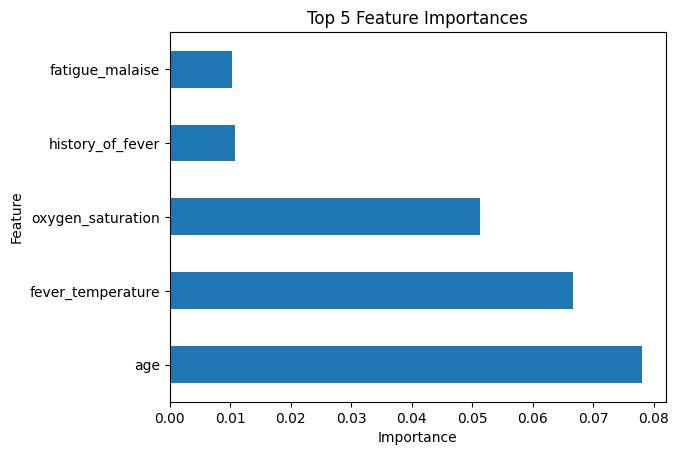

In [ ]:
feature_importances = rf_model.feature_importances_
important_features = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Display the top features
print("Top Features:")
print(important_features.head(5))

# Plot feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 6))
important_features.head(5).plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title("Top 5 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
features.head()

,age,fever_temperature,oxygen_saturation,history_of_fever,cough,sore_throat,runny_nose,wheezing,shortness_of_breath,lower_chest_wall_indrawing,...,admission_date_2022-03-13 13:44:00,admission_date_2022-03-13 13:53:00,admission_date_2022-03-13 13:55:00,admission_date_2022-03-13 14:41:00,admission_date_2022-03-13 14:45:00,admission_date_2022-03-13 14:48:00,admission_date_2022-03-13 15:44:00,admission_date_2022-03-13 15:45:00,admission_date_2022-03-13 17:23:00,admission_date_2022-03-14 00:00:00
0,47,38.2,96,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,23,37.0,96,1,0,1,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,26,38.0,95,1,1,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,60,36.5,95,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,72,36.9,96,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


##Decision tree

In [ ]:
# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

In [ ]:
# Predict and show accuracy
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8233612804878049


In [ ]:
# Keep only the first 47 columns
dataset_limited = features.iloc[:, :47]

# Display the resulting column names
print(dataset_limited.columns.tolist())

['age', 'fever_temperature', 'oxygen_saturation', 'history_of_fever', 'cough', 'sore_throat', 'runny_nose', 'wheezing', 'shortness_of_breath', 'lower_chest_wall_indrawing', 'chest_pain', 'conjunctivitis', 'lymphadenopathy', 'headache', 'loss_of_smell', 'loss_of_taste', 'fatigue_malaise', 'anorexia', 'altered_consciousness_confusion', 'muscle_aches', 'joint_pain', 'inability_to_walk', 'abdominal_pain', 'diarrhoea', 'vomiting_nausea', 'skin_rash', 'bleeding', 'other_symptoms', 'chronic_cardiac_disease', 'hypertension', 'chronic_pulmonary_disease', 'asthma', 'chronic_kidney_disease', 'obesity', 'liver_disease', 'asplenia', 'chronic_neurological_disorder', 'malignant_neoplasm', 'chronic_hematologic_disease', 'aids_hiv', 'diabetes_mellitus_type_1', 'diabetes_mellitus_type_2', 'rheumatologic_disorder', 'dementia', 'tuberculosis', 'smoking', 'other_risks']


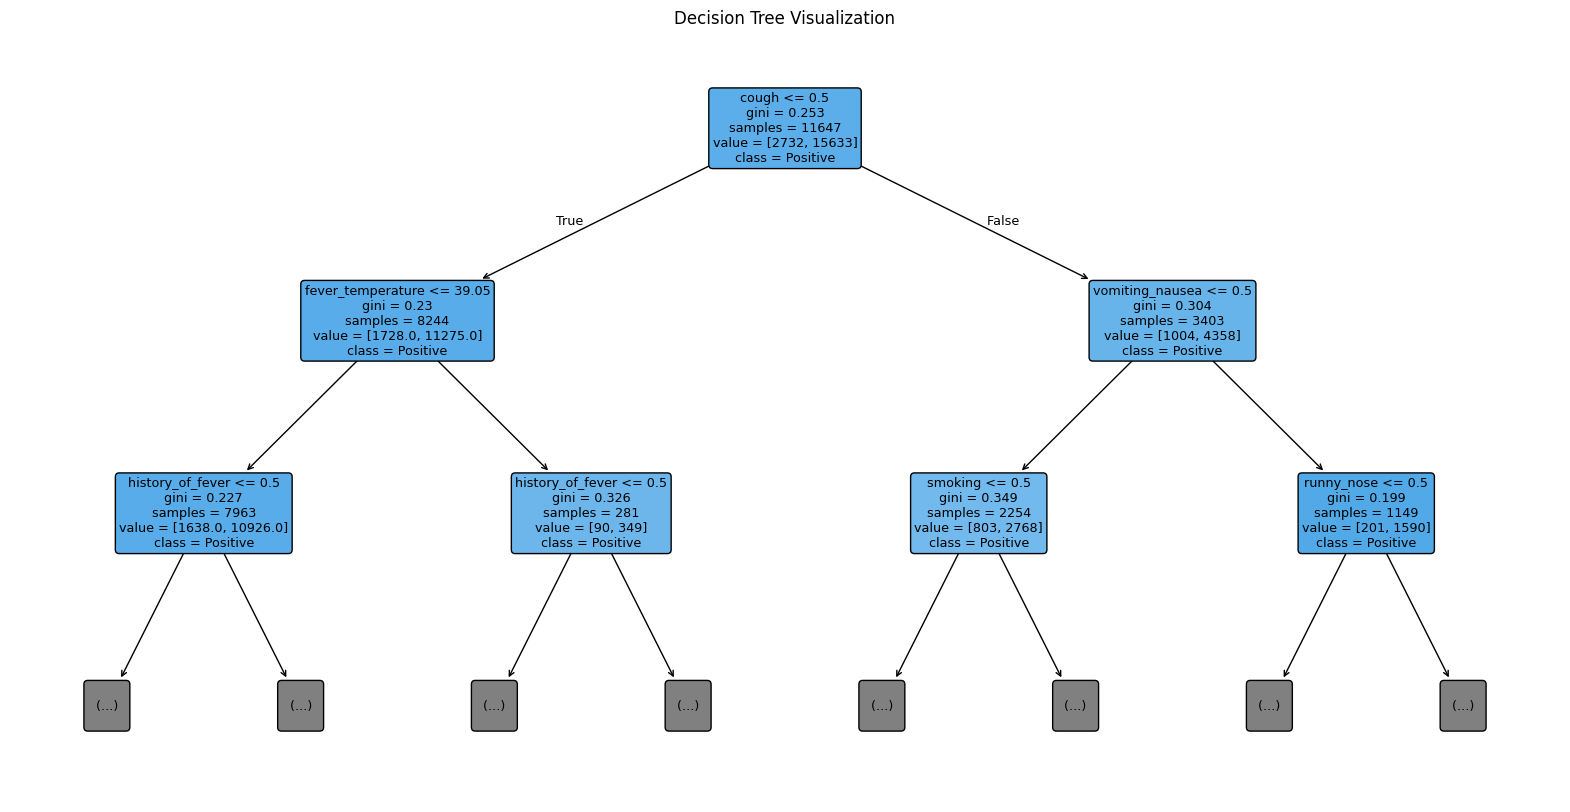

In [ ]:
# Redefine features to include only the first 47 columns, those are the ones without admission date
features_limited = features.iloc[:, :47]

# Split the limited dataset into training and test sets
X_train_limited, X_test_limited, y_train, y_test = train_test_split(features_limited, target, test_size=0.3, random_state=0)

# Train the Random Forest model on the limited dataset
rf_model_limited = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_limited.fit(X_train_limited, y_train)

# Extract one tree from the newly trained Random Forest
single_tree = rf_model_limited.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    single_tree,
    feature_names=features_limited.columns,  # Use limited feature names
    class_names=['Negative', 'Positive', 'Missing'],  # Adjust to your target labels
    filled=True,
    rounded=True,
    max_depth=2  # Limit depth for readability
)
plt.title("Decision Tree Visualization")
plt.show()

This decision tree predicts COVID-19 cases using key features like cough, fever temperature, and vomiting/nausea. Each node shows:

Samples: Number of cases processed.

Gini: Purity of the split (lower is better).

Value: Count of negative and positive cases.

Class: Majority class prediction (Positive/Negative).

Key splits prioritize respiratory symptoms (e.g., cough) and systemic factors (e.g., fever), with cough being the most influential.

##ROC Curve

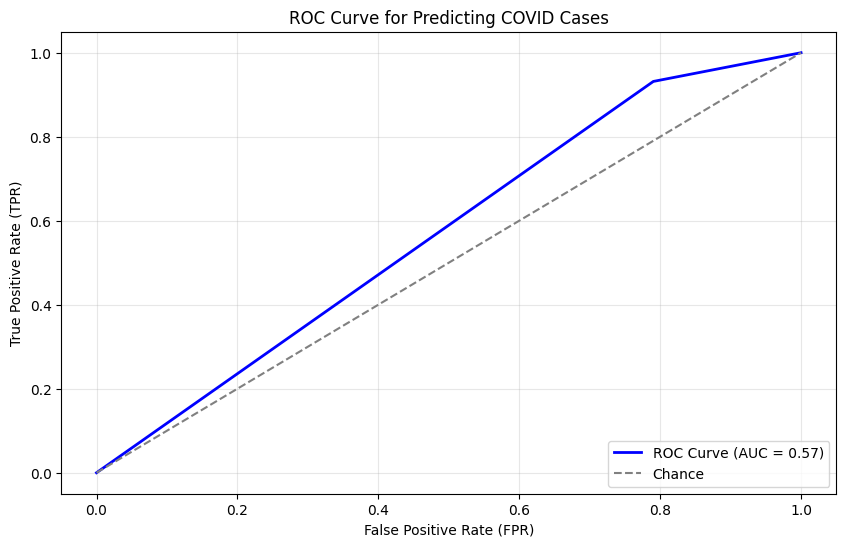

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Predicting COVID Cases')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

#Conclusion

The implementation of a machine learning model for predicting COVID-19 status in hospitals offers a significant advancement in managing resources and patient care during the pandemic. By accurately identifying COVID-positive patients based on key data such as symptoms and vital signs, this model enables hospitals to prioritize testing, optimize bed occupancy, and ensure timely isolation and treatment.

The model’s strong performance in detecting positive cases highlights its potential to enhance hospital workflows, reduce unnecessary testing, and improve the efficiency of resource allocation. By integrating this AI-driven approach into hospital operations, healthcare facilities can better handle the challenges posed by the pandemic, protect their staff and patients, and contribute to broader public health efforts in controlling the spread of COVID-19.